In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import *
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, Lasso, LassoLars, LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import numpy as np

In [ ]:
# Load the data
data = read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# One-hot encoding
data = get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data.head() 

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
# Format and Split the data
x = data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = data['charges']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4)

In [ ]:
# Train the model and make predictions
# Linear Regression
error = []
for i in range(10):
  model = LinearRegression()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Linear Regression',sum(error)/len(error))

Linear Regression 4282.342580546311


In [ ]:
# Ridge Regression 
error = []
for i in range(10):
  model = Ridge()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Ridge Regression',sum(error)/len(error))

Ridge Regression 4294.415444643089


In [ ]:
# BayesianRidge Regression
error = []
for i in range(10):
  model = BayesianRidge()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('BayesianRidge Regression',sum(error)/len(error))

BayesianRidge Regression 4288.276432029095


In [ ]:
# Lasso Regression
error = []
for i in range(10):
  model = Lasso()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Lasso Regression',sum(error)/len(error))

Lasso Regression 4283.116248754755


In [ ]:
# LassoLars Regression
error = []
for i in range(10):
  model = LassoLars()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('LassoLars Regression',sum(error)/len(error))

LassoLars Regression 4290.230852618807


In [ ]:
# Decision Tree Regression
error = []
for i in range(10):
  model = DecisionTreeRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Decision Tree Regression',sum(error)/len(error))

Decision Tree Regression 3308.798412818097


In [ ]:
# Ada Boost Regression
error = []
for i in range(10):
  model = AdaBoostRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Ada Boost Regression',sum(error)/len(error))

Ada Boost Regression 3940.663461321709


In [ ]:
# Gradient Boosting Regression
error = []
for i in range(10):
  model = GradientBoostingRegressor(learning_rate=0.13)
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Gradient Boosting Regression',sum(error)/len(error))

Gradient Boosting Regression 2736.9158897373322


In [ ]:
# XG Boost
error = []
for i in range(10):
  model = XGBRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('XG Boost',sum(error)/len(error))

[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# Random Forest Regression
error = []
for i in range(10):
  model = RandomForestRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Random Forest Regression',sum(error)/len(error))

Random Forest Regression 2861.013449286186


In [ ]:
# Extra Tree Regression
error = []
for i in range(10):
  model = ExtraTreesRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Extra Tree Regression',sum(error)/len(error))

Extra Tree Regression 2811.881274798105


In [ ]:
# Support Vector Regression
error = []
for i in range(10):
  model = SVR(kernel='linear')
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Support Vector Regression',sum(error)/len(error))

Support Vector Regression 5969.508252635548


In [ ]:
# K Nearest Neighbors Regressions
error = []
for i in range(10):
  model = KNeighborsRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('K Nearest Neighbors Regressions',sum(error)/len(error))

K Nearest Neighbors Regressions 7887.855480220149


In [ ]:
# Voting Regressions
error = []
for i in range(10):
  r1 = GradientBoostingRegressor(loss='huber', learning_rate=0.13, max_features='auto', alpha=0.7, random_state=1)
  r2 = GradientBoostingRegressor(loss='huber', learning_rate=0.13, max_features='auto', alpha=0.7, random_state=1)
  model = VotingRegressor([('gbr1', r1), ('gbr2', r2)])
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Voting Regressions',sum(error)/len(error))

Voting Regressions 1508.9180853889197


In [ ]:
# Bagging Regression
error = []
for i in range(10):
  model = BaggingRegressor()
  model.fit(train_x, train_y)
  predicted = model.predict(test_x)
  error.append(mean_absolute_error(test_y, predicted))
print('Bagging Regressions',sum(error)/len(error))

Bagging Regressions 2719.8573220207095


In [ ]:
# Neural Network
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
history = model.fit(train_x, train_y, epochs=100, verbose=0)
predicted = model.predict(test_x)
error = mean_absolute_error(test_y, predicted)
print('Neural Network',error)

Neural Network 3287.1178071072354


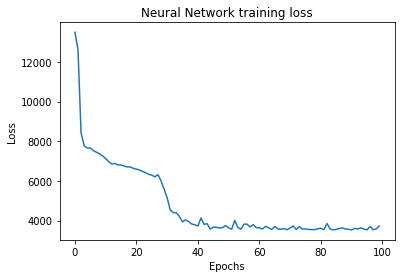

In [ ]:
plt.plot(history.history['loss'])
plt.title('Neural Network training loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Predict cost for a sample customer
sample = DataFrame({
            'age': 26,
            'bmi': 25.44,
            'children': 1,
            'sex_male': 1, 
            'smoker_yes' : 1,
            'region_northwest': 0,
            'region_southeast': 0,
            'region_southwest': 1,
          }, [1])
model.predict(sample)[0]

array([32805.168], dtype=float32)